# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
All data is ready!


In [3]:
%run color_scheme.ipynb

## Verteilung der Inzidenzen in Deutschland

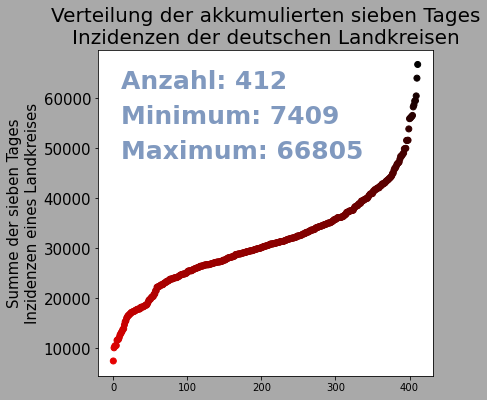

In [10]:
plt.figure(figsize=(6, 6), facecolor='darkgrey')    # enlarge plot
incidences_of_counties_acc = dict()
for AdmUnitId, county in covid19.items():
    incidences_of_counties_acc[AdmUnitId] = sum(county["incidences"])
incidences_sums_copy = list(incidences_of_counties_acc.values()).copy()
incidences_sums_copy.sort()

plt.text(10, 62000, "Anzahl: " + str(len(incidences_sums_copy)),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(10, 55000, "Minimum: " + str(int(incidences_sums_copy[0])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.text(10, 48000, "Maximum: " + str(int(incidences_sums_copy[-1])),
         fontweight=1000, fontsize=25, color=(0.5, 0.6, 0.75))
plt.title("Verteilung der akkumulierten sieben Tages\nInzidenzen der deutschen Landkreisen",
         fontsize=20)
plt.ylabel("Summe der sieben Tages\nInzidenzen eines Landkreises",
         fontsize=15)
plt.yticks(fontsize=15)

colors = list()
for incidences_sum in incidences_sums_copy:
    colors.append(color_scheme(incidences_sum, incidences_sums_copy))
plt.scatter([i for i in range(len(incidences_sums_copy))],
            incidences_sums_copy, color=colors)
#plt.savefig("media/raw_pictures/incidences_sums_counties_distribution.png",
            #facecolor="darkgrey", bbox_inches=Bbox([[-0.7,0.4],[6.1,6]]))

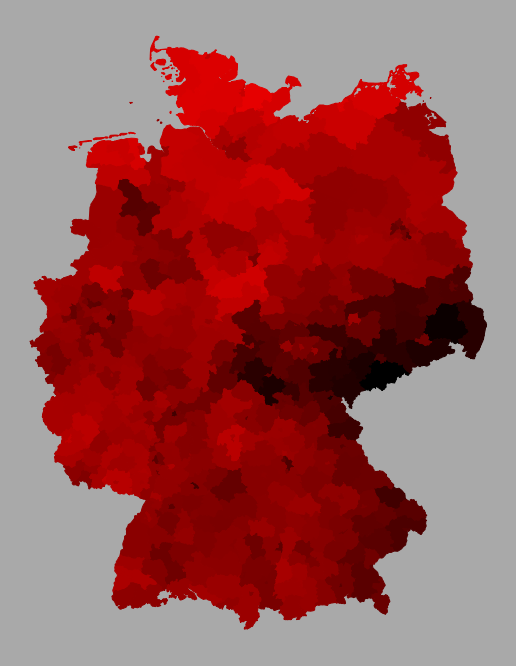

In [5]:
plt.figure(figsize=(9, 12), facecolor='darkgrey')    # enlarge plot
ax = plt.axes(frameon=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('darkgrey')
for AdmUnitId, incidences_sum in incidences_of_counties_acc.items():
    for polygon in counties_geography[AdmUnitId]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color_scheme(incidences_sum, incidences_sums_copy))
#plt.savefig("media/raw_pictures/incidences_sums_counties.png",
            #facecolor="darkgrey", bbox_inches=Bbox([[1,1.5],[8,10.5]]))